In [1]:
import numpy as np
import sys
import skimage.io
from matplotlib import pyplot as plt
from cv2 import cv2

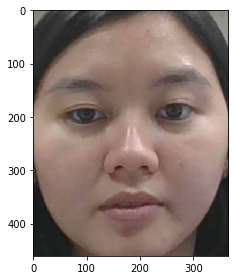

In [12]:
image = skimage.io.imread('../dataset/fake/17.png')
image2 = skimage.io.imread('../dataset/real/839.png')
skimage.io.imshow(image2)

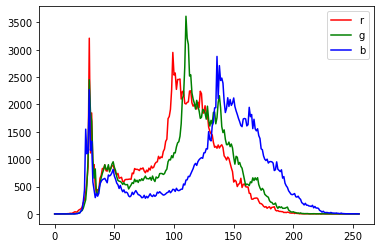

In [3]:
img = image2
b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
plt.plot(hist_r, color='r', label="r")
plt.plot(hist_g, color='g', label="g")
plt.plot(hist_b, color='b', label="b")
plt.legend()
plt.show() 

##### Histogram equalization 
link for reference: https://medium.com/@rndayala/image-histograms-in-opencv-40ee5969a3b7

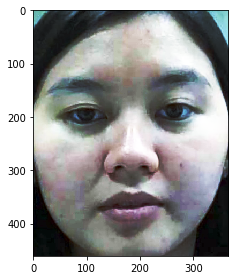

In [4]:
channels = cv2.split(image2)
eq_channels = []
for ch, color in zip(channels, ['B', 'G', 'R']):
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)

skimage.io.imshow(eq_image)

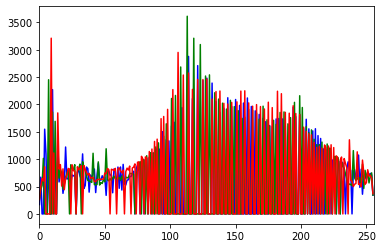

In [5]:
channels = ('b', 'g', 'r')
for i, color in enumerate(channels):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.show()

### HSV Histogram

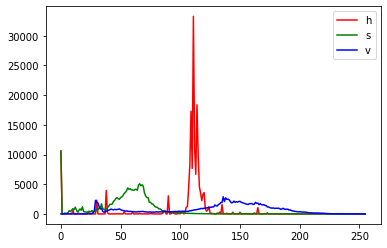

In [6]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

### YCbCr Histogram

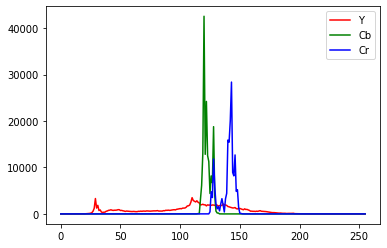

In [7]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cb, Cr = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_Y = cv2.calcHist([Y],[0],None,[256],[0,256])
hist_Cb = cv2.calcHist([Cb],[0],None,[256],[0,256])
hist_Cr = cv2.calcHist([Cr],[0],None,[256],[0,256])
plt.plot(hist_Y, color='r', label="Y")
plt.plot(hist_Cb, color='g', label="Cb")
plt.plot(hist_Cr, color='b', label="Cr")
plt.legend()
plt.show()

### LAB Histogram

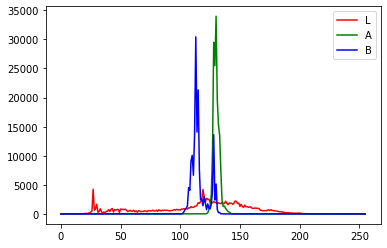

In [8]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_l = cv2.calcHist([l],[0],None,[256],[0,256])
hist_a = cv2.calcHist([a],[0],None,[256],[0,256])
hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
plt.plot(hist_l, color='r', label="L")
plt.plot(hist_a, color='g', label="A")
plt.plot(hist_b, color='b', label="B")
plt.legend()
plt.show()

##### Histogram Concatenation

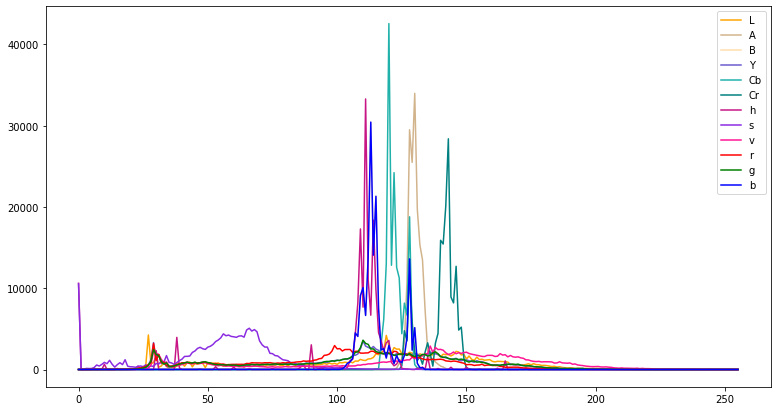

In [9]:

plt.figure(figsize=(13, 7))

hist_l = cv2.calcHist([l],[0],None,[256],[0,256])
hist_a = cv2.calcHist([a],[0],None,[256],[0,256])
hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
plt.plot(hist_l, color='orange', label="L")
plt.plot(hist_a, color='tan', label="A")
plt.plot(hist_b, color='navajowhite', label="B")

hist_Y = cv2.calcHist([Y],[0],None,[256],[0,256])
hist_Cb = cv2.calcHist([Cb],[0],None,[256],[0,256])
hist_Cr = cv2.calcHist([Cr],[0],None,[256],[0,256])
plt.plot(hist_Y, color='slateblue', label="Y")
plt.plot(hist_Cb, color='lightseagreen', label="Cb")
plt.plot(hist_Cr, color='teal', label="Cr")

hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='mediumvioletred', label="h")
plt.plot(hist_s, color='blueviolet', label="s")
plt.plot(hist_v, color='deeppink', label="v")

hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
plt.plot(hist_r, color='r', label="r")
plt.plot(hist_g, color='g', label="g")
plt.plot(hist_b, color='b', label="b")

plt.legend()
plt.show()

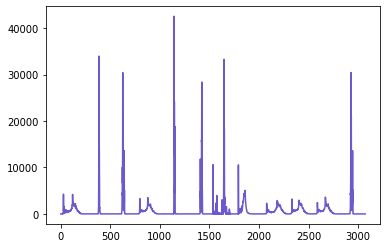

In [10]:
features = []           

f = np.concatenate((hist_l,hist_a,hist_b,hist_Y,hist_Cb,hist_Cr,hist_h,hist_s,hist_v,hist_r,hist_g,hist_b)) 
arr = np.array(f).flatten()
features.append(arr)

plt.plot(arr, color='slateblue', label="r")